In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import files
uploaded = files.upload()

Saving circles.txt to circles.txt


In [9]:
file_path = 'circles.txt'

In [11]:
data = np.loadtxt(file_path, delimiter=',', skiprows=1, dtype=float)

In [13]:
df = pd.DataFrame(data)

In [15]:
df.head()

,0,1,2
0,3.15676,116.12252,6.0
1,16.14436,16.81660,11.0
2,100.31212,64.99025,53.0
3,-1.33773,84.81772,4.0
4,104.37328,62.42373,53.0


In [16]:
X = data[:, :-1]  # คอลัมน์แรกและสอง (x, y)
y = data[:, -1]   # คอลัมน์สุดท้าย (class)

In [18]:
# แบ่งข้อมูลเป็น training และ testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# ขั้นตอนที่ 5: สร้างโมเดล Neural Network (MLP)
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))  # Hidden layer 1
model.add(Dense(64, activation='relu'))              # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))            # Output layer (binary classification)

In [21]:
# ขั้นตอนที่ 6: คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# ขั้นตอนที่ 7: ฝึกสอนโมเดล
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
# or
# history = model.fit(X_train, y_train, epochs=100, validation_split=0.2) # Use 20% of training data for validation

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0137 - loss: -1131441815552.0000 - val_accuracy: 0.0165 - val_loss: -1160796438528.0000
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0131 - loss: -1170191417344.0000 - val_accuracy: 0.0165 - val_loss: -1183246581760.0000
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0150 - loss: -1180853207040.0000 - val_accuracy: 0.0165 - val_loss: -1206022045696.0000
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0146 - loss: -1217667399680.0000 - val_accuracy: 0.0165 - val_loss: -1229024788480.0000
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0153 - loss: -1250201698304.0000 - val_accuracy: 0.0165 - val_loss: -1252334239744.0000
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0123 - loss: -1244018900992.0000 - val_accuracy: 0.0165 - val_loss: -1275980021760.0000
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.013

In [31]:
# ขั้นตอนที่ 8: ประเมินผลโมเดล
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.0f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0127 - loss: -5108948533248.0000
Test accuracy: 2%


In [26]:
# ขั้นตอนที่ 9: แสดงกราฟ loss และ accuracy ในการฝึก
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

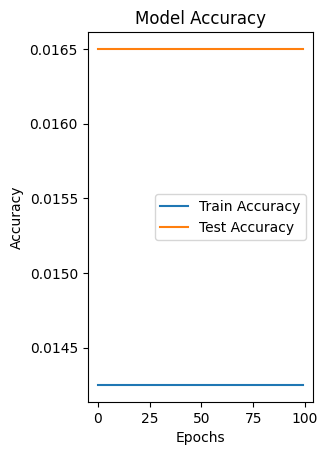

In [29]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

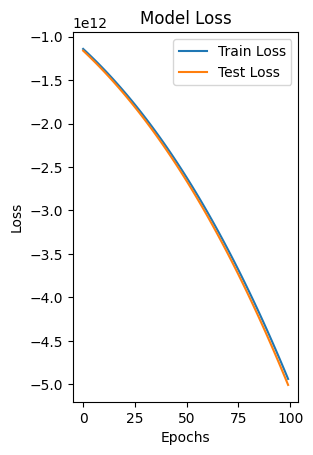

In [30]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()